# Regression linéaire simple

## 1. Importation des données nettoyées et configuration du data set

In [13]:
# On importe les librairies dont on aura besoin pour ce tp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


# On charge le dataset
df = pd.read_csv("../csv/clean.csv", sep=',')

In [14]:
df.shape

(1460, 76)

## 1. Choix du modèle de machine learning

D'après la visualisation des variables quantitatives, on peut se dire que le prix de vente dépend de manière linéaire de GrLivArea. On peut donc émettre une hypothèse de modélisation de type regression linéaire.


GrLivArea: Above grade (ground) living area square feet

GrLivArea: Surface habitable au-dessus du sol en pieds carrés

## 2. Préparation des données

### 2.a échantillonage

In [15]:
# Le jeu de données étant petit il n'est pas nécessaire de réaliser l'apprentissage sur un échantillon

#df.sample(n=10000)

### 2.b Sélection de la variable cible et des variables à explicatives

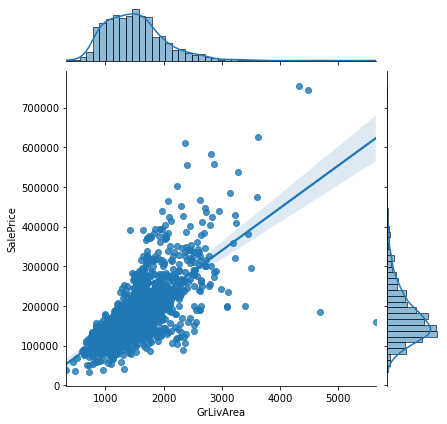

In [16]:
j = sns.jointplot(x = df["GrLivArea"],y =df['SalePrice'],kind ="reg")

On peut voir que lorsque la surface devient un peu trop grande, les données semblent devenir moins modélisables facilement, il y a plus de variabilité. On va considérer pour l'instant résoudre le problème de prédiction pour les montants inférieurs à 400,000€, afin de conserver une robustesse du modèle à ces données plutôt anormales, qui correspondent peut-être à un autre modèle distinct ou à un traitement comme outliers.


In [17]:
df = df[df['SalePrice'] < 400000]

On définit à présent notre variable cible

In [20]:
y = df.SalePrice

Ainsi que nos variables explicatives (qui est ici unique)

In [21]:
X = df[["GrLivArea"]]

## 3. Division du jeu de données en training/validation/testing sets

In [22]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, train_size=0.8)

## 4. Apprentissage sur le training set

#### On implémente la regression linéaire

In [23]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(xtrain, ytrain)

LinearRegression()

In [36]:
print(xtrain)

      GrLivArea
1218        912
765        1506
1018       1472
127         840
1236       1626
...         ...
930        1466
249        2144
1396       1687
281        1262
761        1301

[1145 rows x 1 columns]


#### On obtient ainsi les parmètres β1 et β0 de notre modèle

In [27]:

print("Le coefficient β1 est égal à {} tandis que l'intercept β0 est égal à {}"
      .format(round(regr.coef_[0],2),round(regr.intercept_)))

print("\n")

print("On comprend donc que tout logement coute {} $ auquel il faut ajouter {} $ par pieds carré"
     .format(round(regr.intercept_),round(regr.coef_[0],2)))

Le coefficient β1 est égal à 89.22 tandis que l'intercept β0 est égal à 40995


On comprend donc que tout logement coute 40995 $ auquel il faut ajouter 89.22 $ par pieds carré


#### On peut à présent réaliser des prédictions

In [30]:
x_to_predict = 3000
x_df =  pd.DataFrame({'surface': [x_to_predict]})

print("Selon le modèle, un logement de {} pieds2 doit avoir un prix de vente de {} €"
      .format(x_to_predict, round(regr.predict(x_df)[0])))

print("\n")

print ("On remarque que {} * {} + {} = {}"
       .format(x_to_predict,round(regr.coef_[0],2),round(regr.intercept_),
               x_to_predict*round(regr.coef_[0],2)+round(regr.intercept_)))

Selon le modèle, un logement de 3000 pieds2 doit avoir un prix de vente de 308641 €


On remarque que 3000 * 89.22 + 40995 = 308655.0


#### enfin on peut représenter notre modèle linéaire

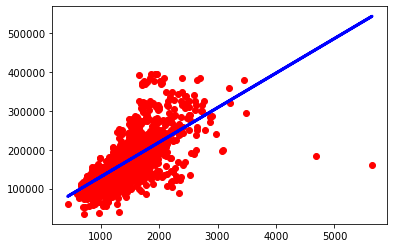

In [29]:
ytrainpred = regr.predict(xtrain)


# Plot outputs
plt.scatter(xtrain, ytrain,  color='red')
plt.plot(xtrain, ytrainpred, color='blue', linewidth=3)

plt.show()

## 5. Evaluation du modèle sur le testing set

In [32]:
from sklearn.metrics import mean_squared_error, r2_score

#### évaluation à partir du R2

In [33]:
ytrainpred = regr.predict(xtrain)
ytestpred = regr.predict(xtest)

print ("Pour les données d'entrainement le R2 vaut {} alors que pour les données de test, il est de {}" 
      .format(round(r2_score(ytrain, ytrainpred),3), round(r2_score(ytest, ytestpred),3)))



Pour les données d'entrainement le R2 vaut 0.437 alors que pour les données de test, il est de 0.451


Le coefficient de détermination R2 est proche de 0.5, ce n'est pas un résultat solide. 
les R2 des jeux d'entrainement et de test sont proche, le modèle est donc robuste.

#### évaluation à partir du RMSE

In [34]:
print ("Pour les données d'entrainement le RMSE vaut {} alors que pour les données de test, il est de {}" 
      .format(round(mean_squared_error(ytrain, ytrainpred, squared=False),3), 
              round(mean_squared_error(ytest, ytestpred, squared=False),3)))

Pour les données d'entrainement le RMSE vaut 49510.255 alors que pour les données de test, il est de 48494.525


A nouveau on remarque qu'il y a peu de perte entre les deux modèles

#### évaluation graphique

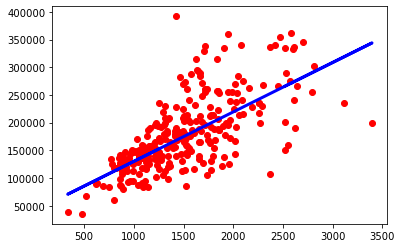

In [35]:
# Plot outputs
plt.scatter(xtest, ytest,  color='red')
plt.plot(xtest, ytestpred, color='blue', linewidth=3)

plt.show()

Il y a une grande dispersion du model.
la variable GrLiveAera à elle seule n'est pas assez pertinente pour calculer le prix de vente.